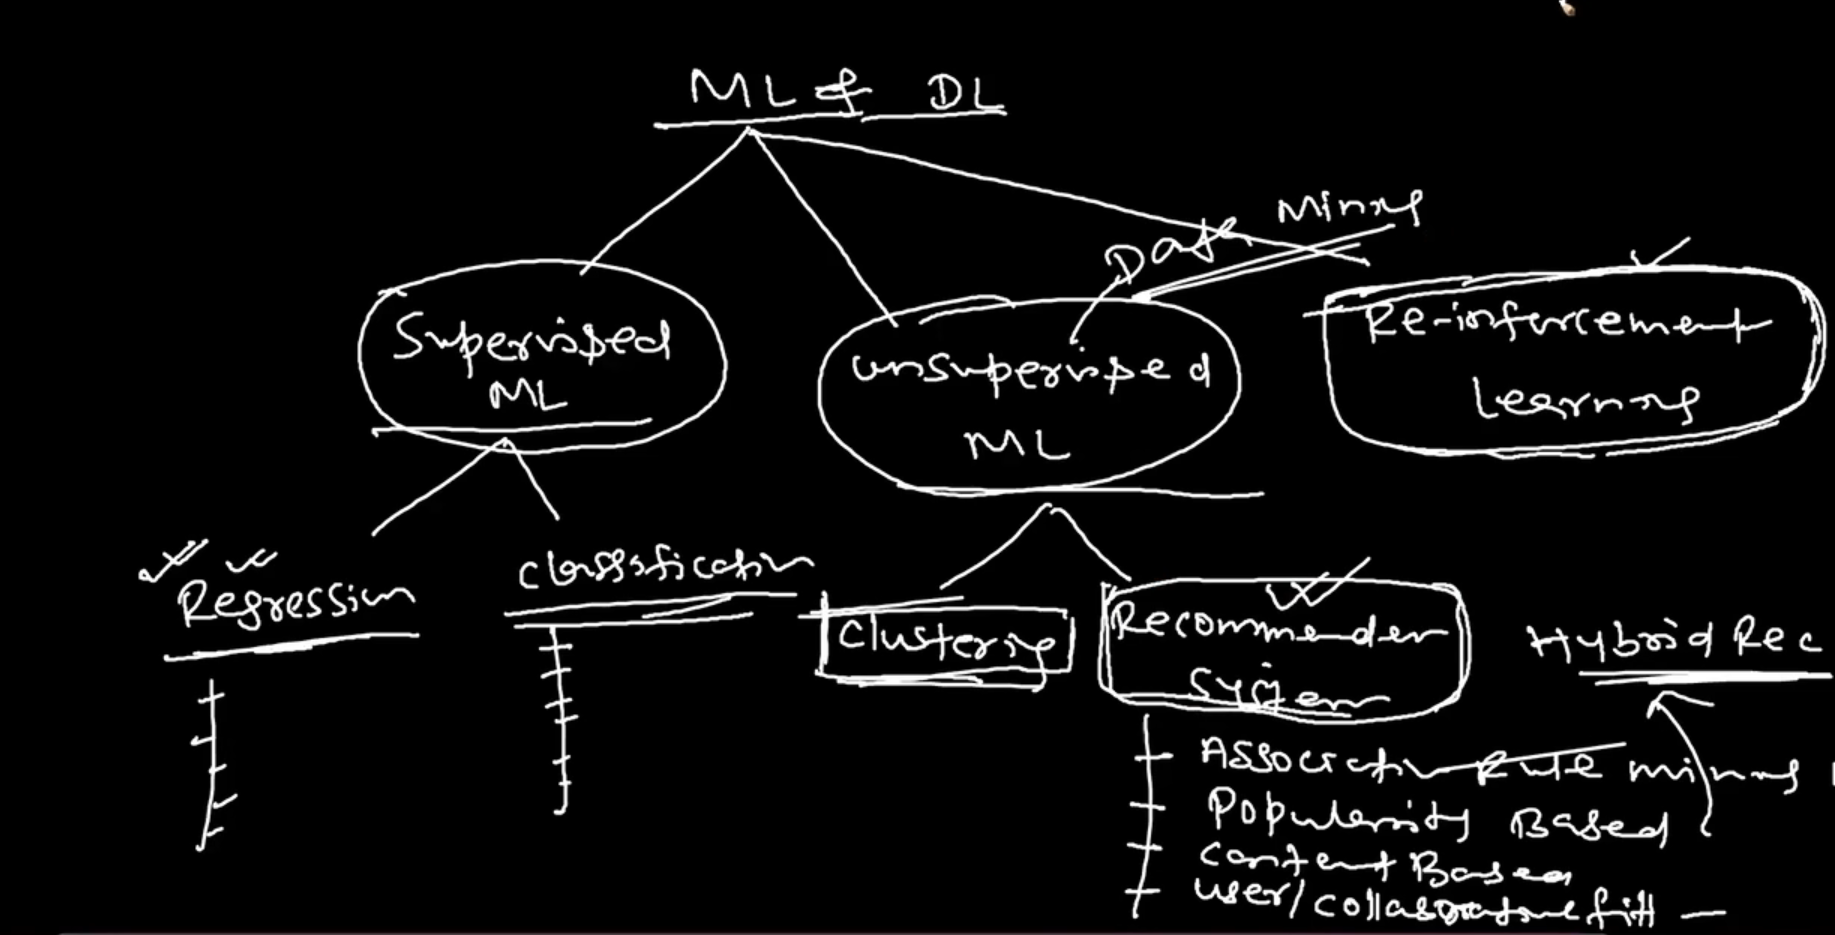

Recommendation systems are Algorithms. 

-> Recommendation Systems are designed to predict what a user may like or be interested in based on their past behavior and preferences.

-> Netflix,YouTube,Tinder and Amazon are all example of Recommender Systems.

       Recommendation Systems models :-
   
   **1.Association rule mining OR Market Basket Analysis -**
   
-> Association Rule mining is based on IF/THEN Statements.

-> Association Rule mining is the method for identifying the correlations,patterns,associations or casual structure in the dataset.

-> Like if a customer buys bread,they are also likely to buy milk.


   **2.Popularity Based -**
   
-> It will Suggest the popular movies based on 5-star ratings.

   **3.Content Based -**
   
-> Content Based means like anybudy preparing for upsc exams then it will recommended upsc related things like upsc book,upsc related video etc.

   **4.Collaborative Filtering Based -**
   
-> Collaborative filtering is a family of algorithms where there are multiple ways to find similar users or items and multiple ways to calculate rating based on ratings of similar users.

   **5.Hybrid Recommendation(combination of all) -**
   
-> It will combine all the model then it will suggest a similar or close item to the users. 

-> Not fully content based or not fully collaborative, between them,it will suggest.


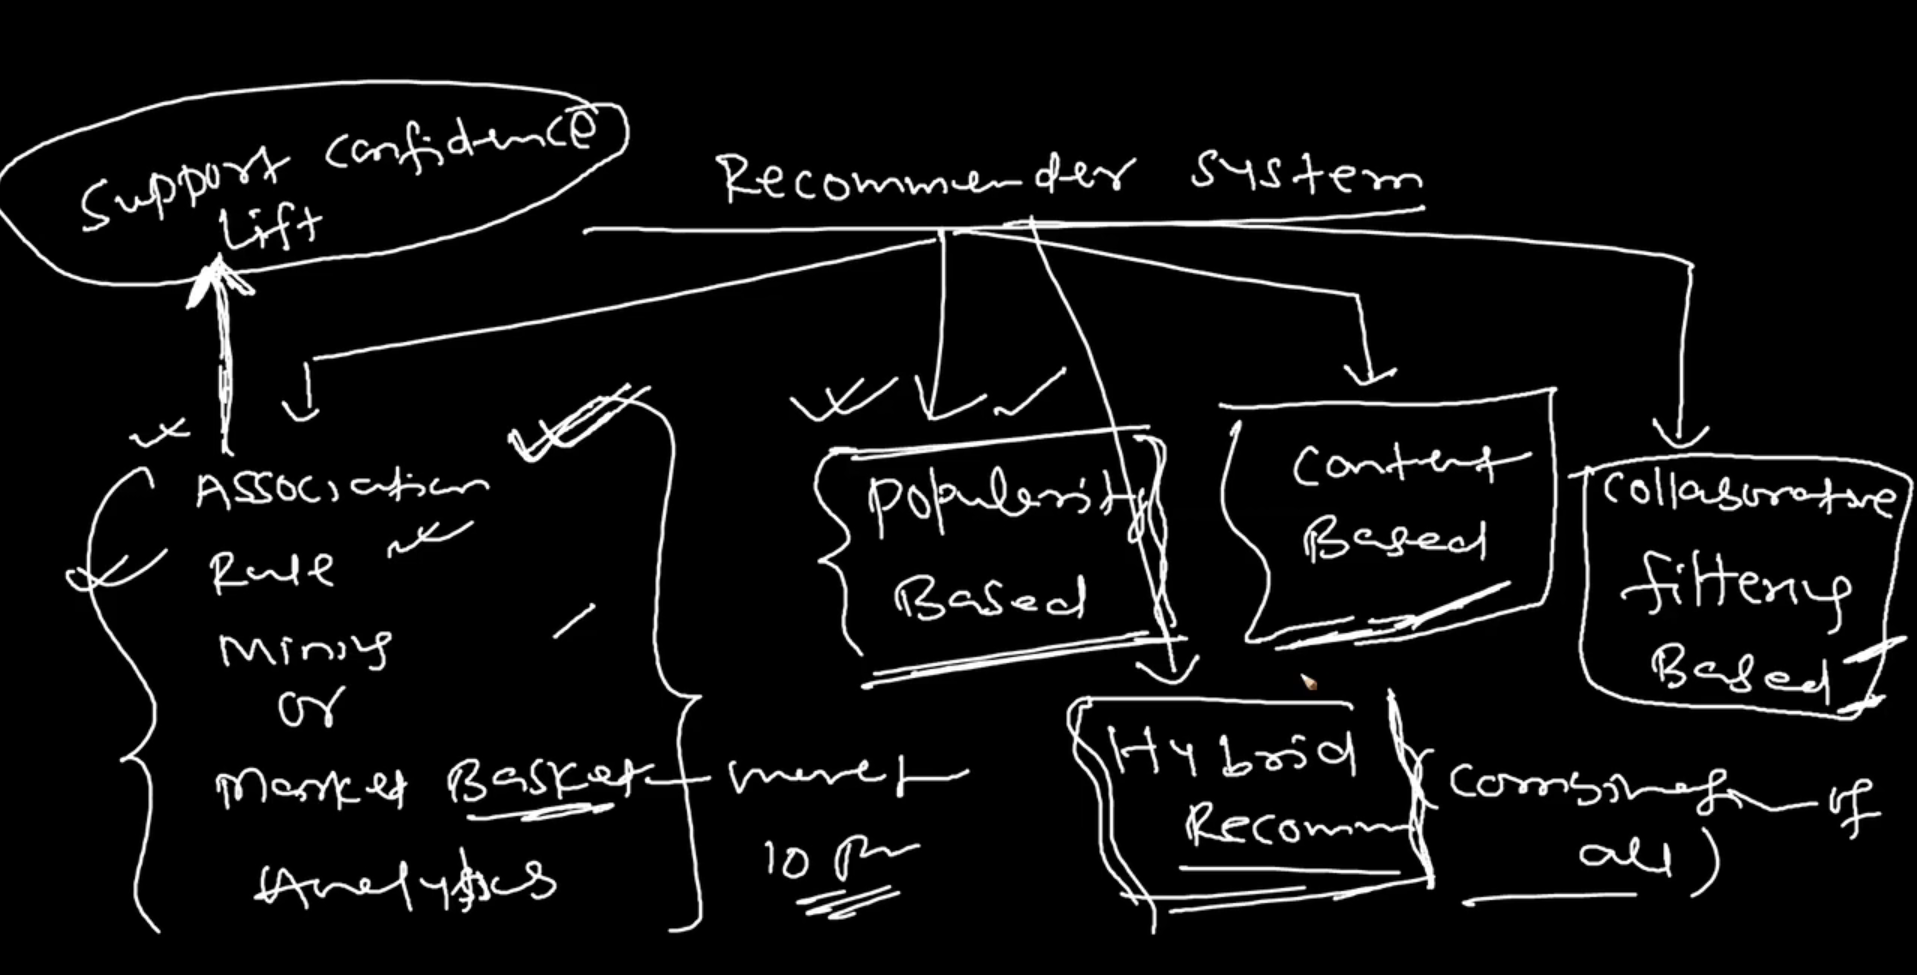

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [184]:
movies=pd.read_csv(r"C:\Users\anasagar\Documents\LearnBay\PROJECT SESSION LEARNBAY\3rd & 4th Feb 2024(Recommendation System)\movies.csv")
credit=pd.read_csv(r"C:\Users\anasagar\Documents\LearnBay\PROJECT SESSION LEARNBAY\3rd & 4th Feb 2024(Recommendation System)\credits.csv")

In [185]:
movies.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [186]:
credit.head(10)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [187]:
movies.shape

(4803, 20)

In [188]:
credit.shape

(4803, 4)

In [189]:
print(movies.columns)
print()
print(credit.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [190]:
# title column present in both dataset so when we have merge the two 
#   dataset based on the title,then title column will come only one time 

In [191]:
print(movies['title'].nunique())
print()
print(credit['title'].nunique())

4800

4800


In [192]:
 # merging the two dataset
movies = movies.merge(credit,on='title')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [193]:
movies.shape

(4809, 23)

In [194]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [195]:
movies.isnull().sum()/len(movies)*100

budget                   0.000000
genres                   0.000000
homepage                64.379289
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062383
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020794
revenue                  0.000000
runtime                  0.041589
spoken_languages         0.000000
status                   0.000000
tagline                 17.550426
title                    0.000000
vote_average             0.000000
vote_count               0.000000
movie_id                 0.000000
cast                     0.000000
crew                     0.000000
dtype: float64

In [196]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [197]:
movies['status'].value_counts()
# approximately all movies released

Released           4801
Rumored               5
Post Production       3
Name: status, dtype: int64

In [198]:
movies['release_date'].describe()

count           4808
unique          3280
top       2006-01-01
freq              10
Name: release_date, dtype: object

In [199]:
movies1=movies.copy()

In [200]:
movies1.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [201]:
movies1['original_language'].value_counts()/len(movies)*100

en    93.782491
fr     1.455604
es     0.665419
zh     0.561447
de     0.561447
hi     0.395093
ja     0.332710
it     0.291121
ko     0.249532
cn     0.249532
ru     0.228738
pt     0.187149
da     0.145560
sv     0.103972
nl     0.083177
fa     0.083177
th     0.062383
he     0.062383
ta     0.041589
cs     0.041589
ro     0.041589
id     0.041589
ar     0.041589
vi     0.020794
sl     0.020794
ps     0.020794
no     0.020794
ky     0.020794
hu     0.020794
pl     0.020794
af     0.020794
nb     0.020794
tr     0.020794
is     0.020794
xx     0.020794
te     0.020794
el     0.020794
Name: original_language, dtype: float64

In [202]:
# Significant Variables to build recommendation system
# 'genres','keywords','overview','title','movie_id','cast','crew'

In [203]:
movies1['popularity'].describe()

count    4809.000000
mean       21.491664
std        31.803366
min         0.000000
25%         4.667230
50%        12.921594
75%        28.350529
max       875.581305
Name: popularity, dtype: float64

In [204]:
movies1 = movies1[['genres','keywords', 'overview', 'title', 'movie_id', 'cast', 'crew']]

In [205]:
movies1.head(2)

,genres,keywords,overview,title,movie_id,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [206]:
movies1['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [207]:
movies1['genres'][1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [208]:
import ast
# ast will filter if any dictionary format data will be there

In [209]:
# ee=movies1['genres'][0]
# mm=[]
# for i in ast.literal_eval(ee):
#     hh=i['name']
#     mm.append(hh)
# print(mm)
    

In [210]:
def convert(text):
    L=[]
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L
        

In [211]:
movies1['genres']=movies1['genres'].apply(convert)

In [212]:
movies1.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",John Carter,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [213]:
movies1['keywords']=movies1['keywords'].apply(convert)

In [214]:
movies1.head(2)

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [215]:
movies1['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [216]:
# rr=movies1['cast']
# counter=0
# for i in ast.literal_eval(rr):
#     if counter < 3:
#         print(i['name'])
#     counter +=1


In [217]:
def convert2(text):
    counter = 0
    mm=[]
    for i in ast.literal_eval(text):
        if counter <3:
            mm.append(i['name'])
        counter +=1
    return mm
        

In [218]:
movies1['cast']=movies['cast'].apply(convert2)

In [219]:
movies1.head(2)

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [220]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [221]:
# movies1['crew']=movies1['crew'].apply(convert2)

In [222]:
movies1.head(2)

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [223]:
# tt=movies1['crew'][0]
# kk=[]
# for i in ast.literal_eval(tt):
#     if i['job']=='Director':
#         kk.append(i['name'])
# print(kk)

In [224]:
def fetch_director(text):
    kk=[]
    for i in ast.literal_eval(text):
        if i['job']=='Director':
            kk.append(i['name'])
    return kk

In [225]:
movies1['crew']=movies1['crew'].apply(fetch_director)

In [226]:
movies1.head(2)

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [228]:
# check missing data is there or not now
movies1.isnull().sum()
# only three data is missing in overview so we can drop them.

genres      0
keywords    0
overview    3
title       0
movie_id    0
cast        0
crew        0
dtype: int64

In [229]:
movies1.isnull().sum()/len(movies)*100

genres      0.000000
keywords    0.000000
overview    0.062383
title       0.000000
movie_id    0.000000
cast        0.000000
crew        0.000000
dtype: float64

In [233]:
# dropping permanently
movies1.dropna(inplace=True)

In [235]:
movies1.isnull().sum()

genres      0
keywords    0
overview    0
title       0
movie_id    0
cast        0
crew        0
dtype: int64

In [236]:
movies1.shape

(4806, 7)

In [237]:
movies1.head(2)

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [ ]:
# when we will build recommended system then each word have some token
# token is nothing text to vector

In [ ]:
# in cast,crew have 

In [238]:
# In cast column Sam Worthington,Zoe Saldana,Sigourney Weaver between name 
#   space is there so if we convert text to vector then we have to create token 
#    for space,if we remove the space then it will not create unnecessary token.

In [239]:
def space_remove(text):
    qq=[]
    for i in text:
        qq.append(i.replace(' ',''))
    return qq

In [241]:
movies1['genres'] = movies1['genres'].apply(space_remove)
movies1['keywords'] = movies1['keywords'].apply(space_remove)
movies1['cast'] = movies1['cast'].apply(space_remove)
movies1['crew'] = movies1['crew'].apply(space_remove)

In [243]:
movies1.head(2)

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


In [244]:
movies1['cast'][0]

['SamWorthington', 'ZoeSaldana', 'SigourneyWeaver']

In [246]:
movies1['crew'][0]

['JamesCameron']

In [251]:
movies1['keywords'][0]

['cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d']

In [253]:
movies['overview'][0]
# entire sentence is coming in a single quotes
# so firstly we have to convert into a word then we can build recommendation system

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [256]:
# if we will convert into number how will do it, so first we have to split into a word by word
movies1['overview']=movies1['overview'].apply(lambda x:x.split())

In [257]:
movies1['overview'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [258]:
movies1.head(2)

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",Pirates of the Caribbean: At World's End,285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


In [259]:
# 3 columns : title, movie_id, context (merge all variables - genres, keywords, overview, cast & crew)

In [260]:
movies1['context']=movies1['genres']+movies1['keywords']+movies1['overview']+movies1['cast']+movies1['crew']
# one by one we can not a recommended system, thats 
#   why i merge together and make one column where all the information is there genres,
#    keywords,overview,cast,crew after that convert into a number 

In [262]:
movies1['context'][0]

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [263]:
movies1.head(2)

,genres,keywords,overview,title,movie_id,cast,crew,context
0,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",Pirates of the Caribbean: At World's End,285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Adventure, Fantasy, Action, ocean, drugabuse,..."


In [265]:
movies1=movies1.drop(columns=['genres','keywords','overview','cast','crew'],axis=1)

In [266]:
movies1.head(2)

,title,movie_id,context
0,Avatar,19995,"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action, ocean, drugabuse,..."


In [268]:
movies1['context'][0]

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [270]:
# now we have to make one sentence, so machine can easily understand for maximum matching 

movies1['context']=movies1['context'].apply(lambda x:" ".join(x))

In [272]:
movies1['context'][0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [273]:
# here we can not use one hot encoder because if we will go in the real 
#   time dataset we may have so many vocab size will be there and we 
#   can not create one by one column, so another approach is thre BOW(bags of word),
#    Termfrequency-InverseDocument frequency,N-grams

In [274]:
# one hot encoder we can go when single word is there like location,designation etc.

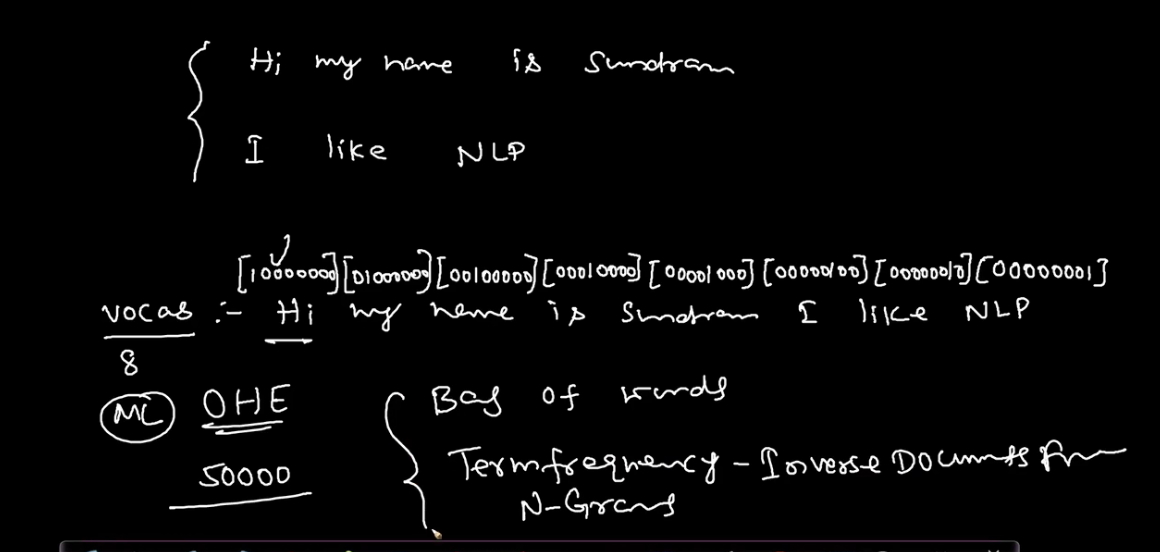

**Bags of Words(BOW) - Feature Extraction**



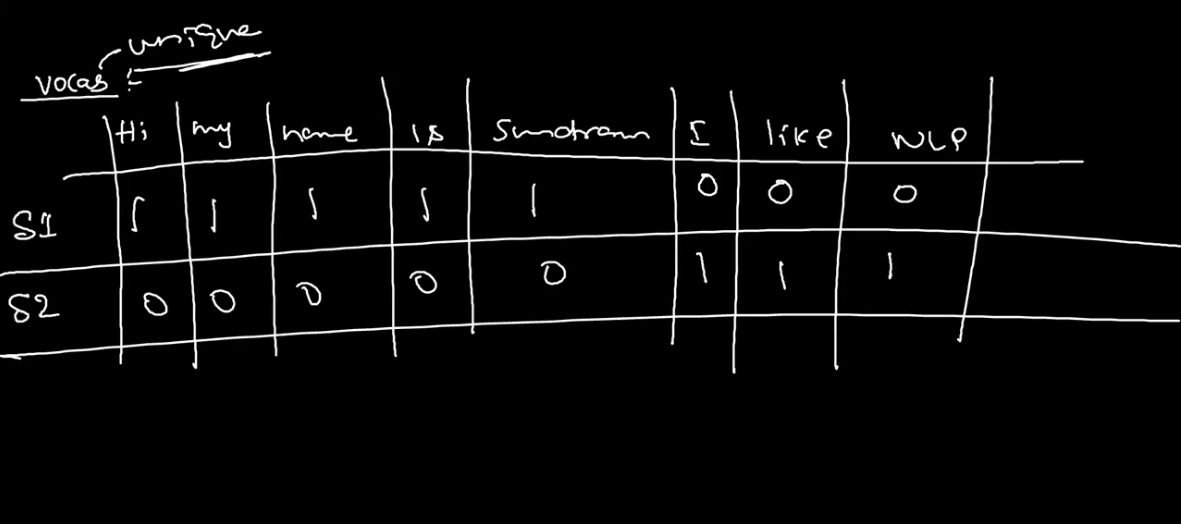

In Bow(bags of words),Any Word you have seen repeted there,It will considered only once. 

In [275]:
from sklearn.feature_extraction.text import CountVectorizer # each text data convert into a number form
# cv = CountVectorizer(stop_words='english')
cv = CountVectorizer(max_features=5000,stop_words='english')
# max_features=5000 ,i can give hard coded rule 5000, which are the 
#   top 5000 words,on the basis of 5000 words,i can recommended to watch movie 

In [276]:
vector = cv.fit_transform(movies1['context']).toarray()

In [278]:
vector.shape

(4806, 5000)

In [279]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**BUILDING RECOMMENDATION SYSTEM BASIS SIMILIRITY MATRIX**

In [280]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [281]:
similarity
# closer to 1, means good to recommended

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [296]:
movies1.tail(5)

,title,movie_id,context
4804,El Mariachi,9367,Action Crime Thriller unitedstates–mexicobarri...
4805,Newlyweds,72766,Comedy Romance A newlywed couple's honeymoon i...
4806,"Signed, Sealed, Delivered",231617,Comedy Drama Romance TVMovie date loveatfirsts...
4807,Shanghai Calling,126186,When ambitious New York attorney Sam is sent t...
4808,My Date with Drew,25975,Documentary obsession camcorder crush dreamgir...


In [284]:
movies1[movies['title']=='Spectre'].index[0]
# it will give the index

C:\Users\anasagar\AppData\Local\Temp\ipykernel_21596\2093321328.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies1[movies['title']=='Spectre'].index[0]


2

In [291]:
def recommendation(movies):
    index=movies1[movies1['title']==movies].index[0]
    distances=sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x:x[1])
    
    for i in distances[1:6]:
        print(movies1.iloc[i[0]].title)

In [292]:
recommendation('Avatar')
# it will recommended 5 more movie like Avatar type

Titan A.E.
Small Soldiers
Ender's Game
Aliens vs Predator: Requiem
Independence Day


In [295]:
recommendation('The Dark Knight Rises')

The Dark Knight
Batman Begins
Batman
Batman Returns
Batman


In [299]:
recommendation('Newlyweds')

Bad Grandpa
Captive
Whale Rider
Elizabethtown
How to Fall in Love


In [300]:
import pickle
# save the model

In [ ]:
pickle.dump(new, open('movie_list.pkl','wb'))
pickle.dump(similarity, open('similarity.pkl','wb'))